# **INTRODUCTION TO MEDICAL IMAGING IN PYTHON**


# OBJECTIVE

Information from medical images represents one of the important sources of information in the field of Biomedical Data Science. However, the complexity of this type of structured data requires specific tools and procedures in order to maximize the information that can be obtained from these images.

The main objective of this practical session is to become familiar with the handling and processing of medical images. 

The following practical session is divided in three main blocks:
* In the first block we will study how to read different formats of biomedical images as well as how to extract the crucial metadata for their correct interpretation.
* In the second block we will focus on basic image processing operations and the application of different coordinate transformations.
* In the last block we will define and apply a complete processing pipeline for neuroimaging.

# MATERIALS

* In this practical lesson we will use the following images
    * *TCIA-DICOM/1-014.dcm* This DICOM file provide from TCIA-GBM open dataset.
    * *IVY_GAP_W01* This folder contains different MRI image from a single brain tumor study.
    * *MNI_ATLAS* This folder contains the MRI MNI atlas.
* The images needed for this practice are available through the following link.
* In order to work with these images from google colab, you can upload them to your Google Drive space.
* Then just run the following code to mount your google drive and have it accessible from colab. 

```
from google.colab import drive
drive.mount('/content/drive')
```





# METHODOLOGY
# Part 1 - Medical image handling (loading, basic processing and saving)

## 1.1. Introduction 


*   In this first part of the lab we will see how to read DICOM and NIFTI files in python and extract the image information and its contextual metadata. 
*   We will also apply basic operations seen in theory to the images. These include intensity changes, contrast changes, histogram matching, and application of common filters such as gaussian or edge enhancement. 
*   Finally we will save the generated images as nifti for later viewing and comparison.


## 1.2. Reading a medical image in DICOM format

### Import the required libaries

* To be able to read dicom data we need to import "dcread" function from *pydicom* library. 
* Additionally for being able to plot the image data embeded in the dicom file we will import *matplotlib.pytplot*
* Note: to import libraries not pre-included in Google colab you can use the command "! pip install *requered library*".


In [1]:
import pydicom
import matplotlib.pyplot as plt

### Load the dicom file 
Load the dicom file *TCIA-DICOM/1-014.dcm* using the dcmread command

In [2]:
dicom_file_path = "./DATA_FOR_LAB/TCIA_DICOM/1-014.dcm"
dicom_data = pydicom.dcmread(dicom_file_path)

Explore the metadata asociated with the dicom file. In particular obtain the following parameters:


*   Patient ID
*   Modality
*   Study date
*   Image size
*   Pixel Spacing



In [3]:
image_data = dicom_data.pixel_array

print("Patient ID:", dicom_data.PatientID)
print("Modality:", dicom_data.Modality)
print("Study Date:", dicom_data.StudyDate)
print("Image Size:", image_data.shape)
print("Pixel Spacing:", dicom_data.PixelSpacing)

Patient ID: TCGA-02-0027
Modality: MR
Study Date: 19990328
Image Size: (512, 512)
Pixel Spacing: [0.488281, 0.488281]


The image data is located in the *pixel_array* attribute of the imported dicom object.

Now you can plot the image data obtained using imshow from matplotlib.

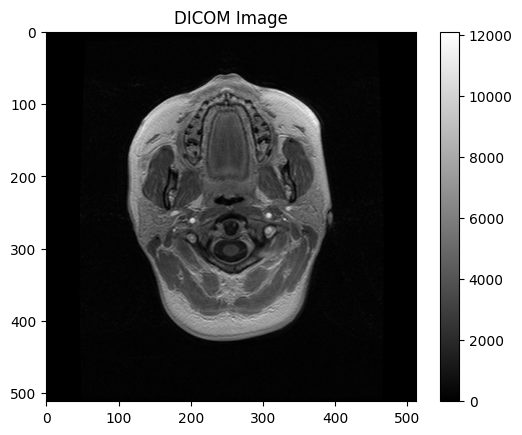

In [4]:
plt.imshow(image_data, cmap='gray')
plt.title("DICOM Image")
plt.colorbar()
plt.show()

## 1.3 Reading a medical image in NIFTI format



### Import the required libraries
Import *nibabel* library

In [5]:
import nibabel as nib

### Load a nifti file

* Use the *nibabel.load* comand to load the *IVY_GAP_W01/T1c/T1.nii* nifti image. 
* As a result we will obtain a nibabel image object.

In [6]:
nifti_file_path = "./DATA_FOR_LAB/IVY_GAP_W01/T1c/T1c.nii"
nifti_image = nib.load(nifti_file_path)

As with any Python object, you can inspect *img* to see what attributes it has. We recommend using IPython tab completion for this, but here are some examples of interesting attributes:


### Exploring the nibabel object attributtes

A nibabel image object is the association of three things:

* an N-D array containing the image data;
* a (4, 4) affine matrix mapping array coordinates to coordinates in some RAS+ world coordinate space (Coordinate systems and affines);
* image metadata in the form of a header

#### Affine matrix

**affine** is the affine array relating array coordinates from the image data array to coordinates in some RAS+ world coordinate system ([Coordinate systems and affines](https://https://nipy.org/nibabel/coordinate_systems.html)):

Print the affine attributte of the nibabel object 

In [7]:
affine_matrix = nifti_image.affine
print("Affine Matrix:")
print(affine_matrix)

Affine Matrix:
[[ -1.01559997   0.           0.         130.897995  ]
 [  0.           1.01559997   0.         -93.8609848 ]
 [  0.           0.           1.5        -28.34379959]
 [  0.           0.           0.           1.        ]]


#### Image metadata

The header of an image contains the image metadata. The information in the header will differ between different image formats. For example, the header information for a NIfTI1 format file differs from the header information for a MINC format file.

Our image is a NIfTI1 format image, and it therefore has a NIfTI1 format header:

In [8]:
header = nifti_image.header
print("Header Information:")
print(header)

Header Information:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 256 120   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.0000000e+00  1.0156000e+00  1.0156000e+00  1.5000000e+00
  5.9439996e-03  1.0000000e+00  1.0000000e+00  6.8553000e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : np.bytes_(b'TE=2.532000065;sec=68553.0000')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code

*Note: For the record, srow_x, srow_y, srow_z is the affine matrix of the image. Bitpix is how many bits we use to represent each pixel intensity.*

The header of any image will normally have the following methods:

* get_data_shape() to get the output shape of the image data array

* get_data_dtype() to get the numpy data type in which the image data is stored (or will be stored if you save the image)

* get_zooms() to get the voxel sizes in millimeters

The last value of header.get_zooms() is the time between scans in milliseconds (for dynamic sequences); this is the equivalent of voxel size on the time axis.

Apply these methods to our loaded image:

In [9]:
print("Data Shape:", header.get_data_shape())
print("Data Type:", header.get_data_dtype())
print("Voxel Sizes:", header.get_zooms())

Data Shape: (256, 256, 120)
Data Type: int16
Voxel Sizes: (np.float32(1.0156), np.float32(1.0156), np.float32(1.5))


#### Image data array
We can get the data from the nifti object with the get_fdata() method.
For the array image, get_fdata() just returns the data array.

In [10]:
image_data = nifti_image.get_fdata()

We can check the shape of the array provided by image_data.

In [11]:
print("Shape of the Image Data Array:", image_data.shape)

Shape of the Image Data Array: (256, 256, 120)


Now just select a 2D slice in the middle of the field of view (the one on the middle of the z-axis) to plot it with *imshow* command.

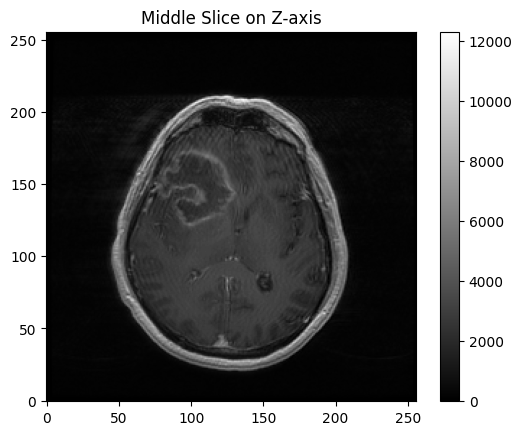

In [12]:
middle_z_index = image_data.shape[2] // 2
slice_data = image_data[:, :, middle_z_index]

plt.imshow(slice_data.T, cmap='gray', origin='lower')
plt.title("Middle Slice on Z-axis")
plt.colorbar()
plt.show()

## 1.4 Basic processing 

Our goal now will be to be able to modify the image using some of the basic image processing methods we have seen in the theory classes.


### Use of the histogram to analyze changes in intensity distributions

First of all we will analyse the histogram of the image. To do so we can use the *plt.hist* function included in *matplotlib* library. To show the relation between the image and the histogram is convenient to plot both the histogram and an 2D slice (e.g. the one in the middle of the field of view) side by side. 

Note: To see the results of the brightness and contrast increase we need to plot the images with the same intensity range, if not *imshow* command will reescale intensities and not visible effect will appear. For example we can use vmin = 0 and vmax = 50000

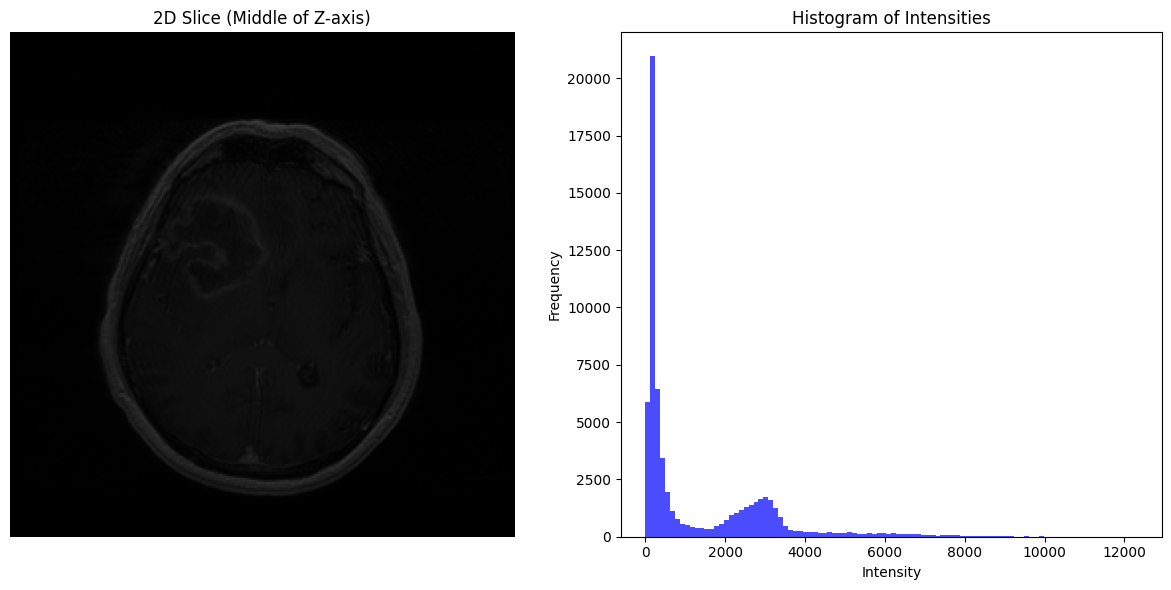

In [13]:
import numpy as np

hist, bins = np.histogram(slice_data.flatten(), bins=100)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=50000)
axes[0].set_title("2D Slice (Middle of Z-axis)")
axes[0].axis("off")

axes[1].hist(slice_data.flatten(), bins=100, color='blue', alpha=0.7)
axes[1].set_title("Histogram of Intensities")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

### Brightness

* We can increase/decrease the brightness of the image by just adding/substracting a constant value to the image intensity matrix(image data array).

* To test this we will create a new image data array equal to the used before but adding a constant value to all the values in the image data array.

```
image_data_bri = image_data + constant
```

* To check the results we will plot the resulting histogram with and a 2D slice of the image data array  side by side. 



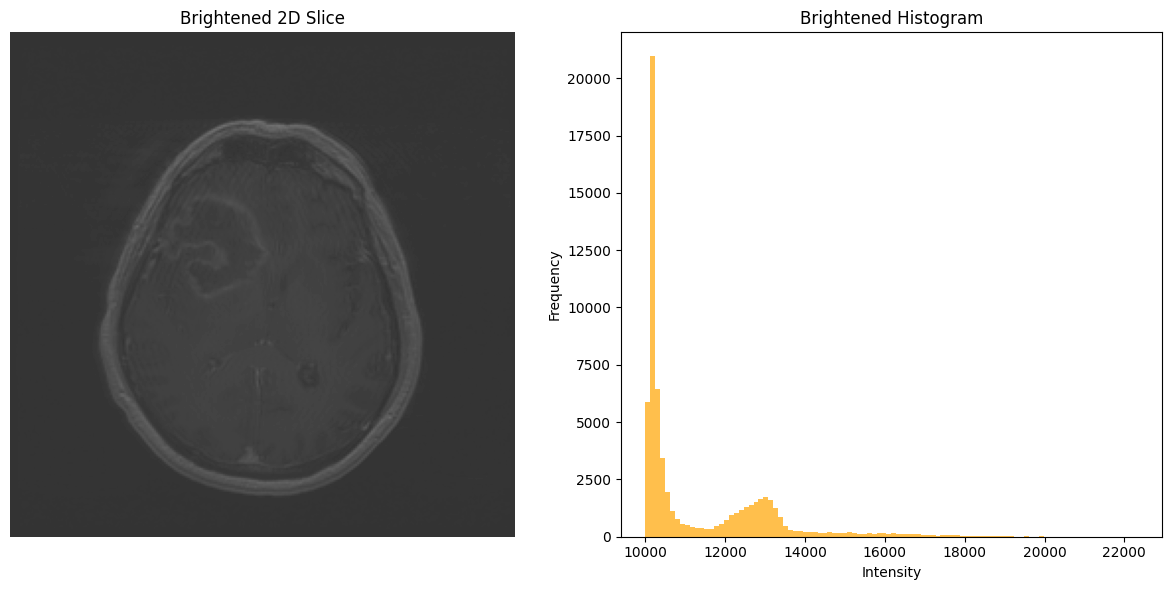

In [14]:
brightness_constant = 10000  
image_data_bri = np.clip(slice_data + brightness_constant, 0, 50000)  

brightened_hist, _ = np.histogram(image_data_bri.flatten(), bins=100)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_data_bri.T, cmap='gray', origin='lower', vmin=0, vmax=50000)
axes[0].set_title("Brightened 2D Slice")
axes[0].axis("off")

axes[1].hist(image_data_bri.flatten(), bins=100, color='orange', alpha=0.7)
axes[1].set_title("Brightened Histogram")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Contrast

* We can increase/decrease the contrast of an image by  multiplying/dividing the image by a constant, this widens/shortens the distance between intensity values in the image.

* To test this we will create a new image data array equal to the used before but multipliying by a constant value to all the values in the image data array.
image_data_contrast = image_data + constant
To check the results we will plot the resulting histogram with and a 2D slice of the image data array side by side.


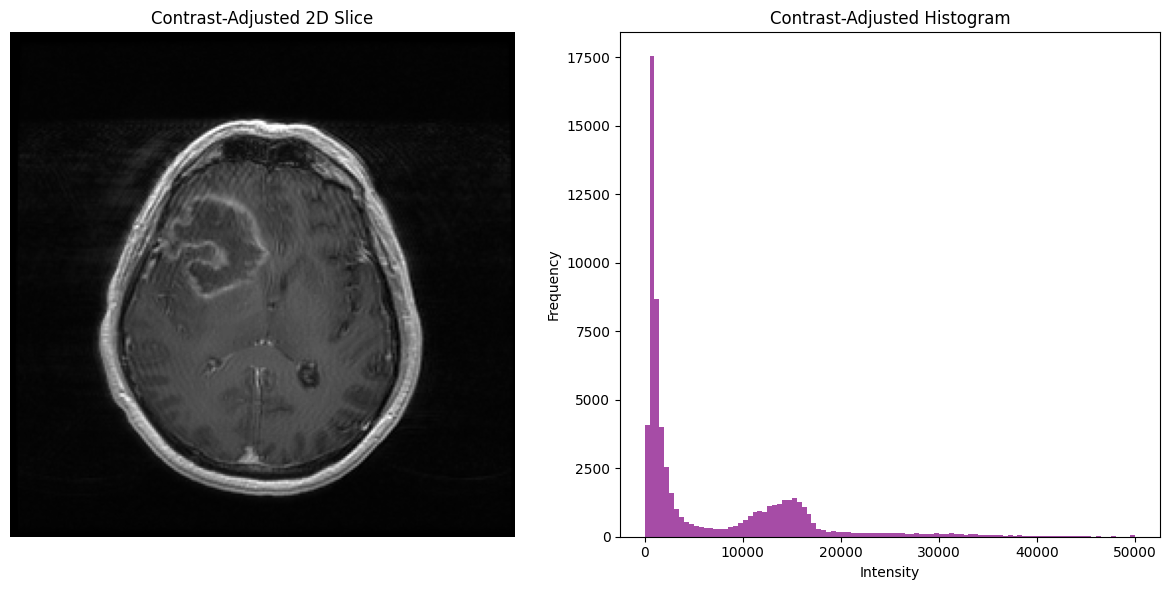

In [15]:
contrast_constant = 5
image_data_contrast = np.clip(slice_data * contrast_constant, 0, 50000)

contrast_hist, _ = np.histogram(image_data_contrast.flatten(), bins=100)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_data_contrast.T, cmap='gray', origin='lower', vmin=0, vmax=50000)
axes[0].set_title("Contrast-Adjusted 2D Slice")
axes[0].axis("off")

axes[1].hist(image_data_contrast.flatten(), bins=100, color='purple', alpha=0.7)
axes[1].set_title("Contrast-Adjusted Histogram")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Histogram equalization

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. This method usually increases the global contrast of many images, especially when the image is represented by a narrow range of intensity values. Through this adjustment, the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which use to degrade image contrast (source: [Wiki](https://en.wikipedia.org/wiki/Histogram_equalization)).

To test the histogram equalization in our sample image:
* We can use the *exposure.equalize_hist* function from *skimage* library

* Try to plot the original histogram and original image together with the histogram and resulting image  after equalization.

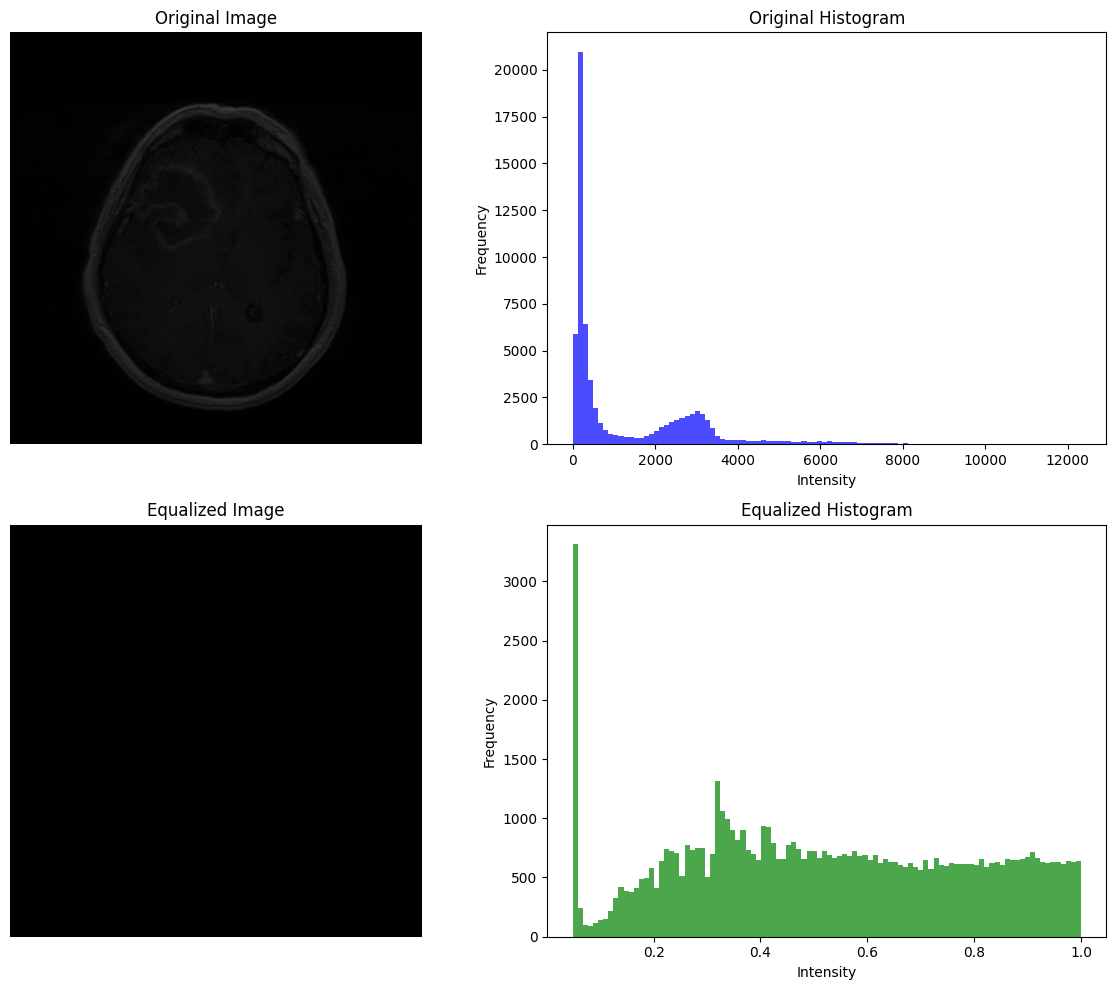

In [16]:
from skimage import exposure

equalized_slice = exposure.equalize_hist(slice_data)

original_hist, bins = np.histogram(slice_data.flatten(), bins=100)
equalized_hist, _ = np.histogram(equalized_slice.flatten(), bins=100)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original
axes[0, 0].imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=50000)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].hist(slice_data.flatten(), bins=100, color='blue', alpha=0.7)
axes[0, 1].set_title("Original Histogram")
axes[0, 1].set_xlabel("Intensity")
axes[0, 1].set_ylabel("Frequency")

#Equalized
axes[1, 0].imshow(equalized_slice.T, cmap='gray', origin='lower', vmin=0, vmax=50000)
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

axes[1, 1].hist(equalized_slice.flatten(), bins=100, color='green', alpha=0.7)
axes[1, 1].set_title("Equalized Histogram")
axes[1, 1].set_xlabel("Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Why does it happens? 

Try to define a mask that solves this problem.

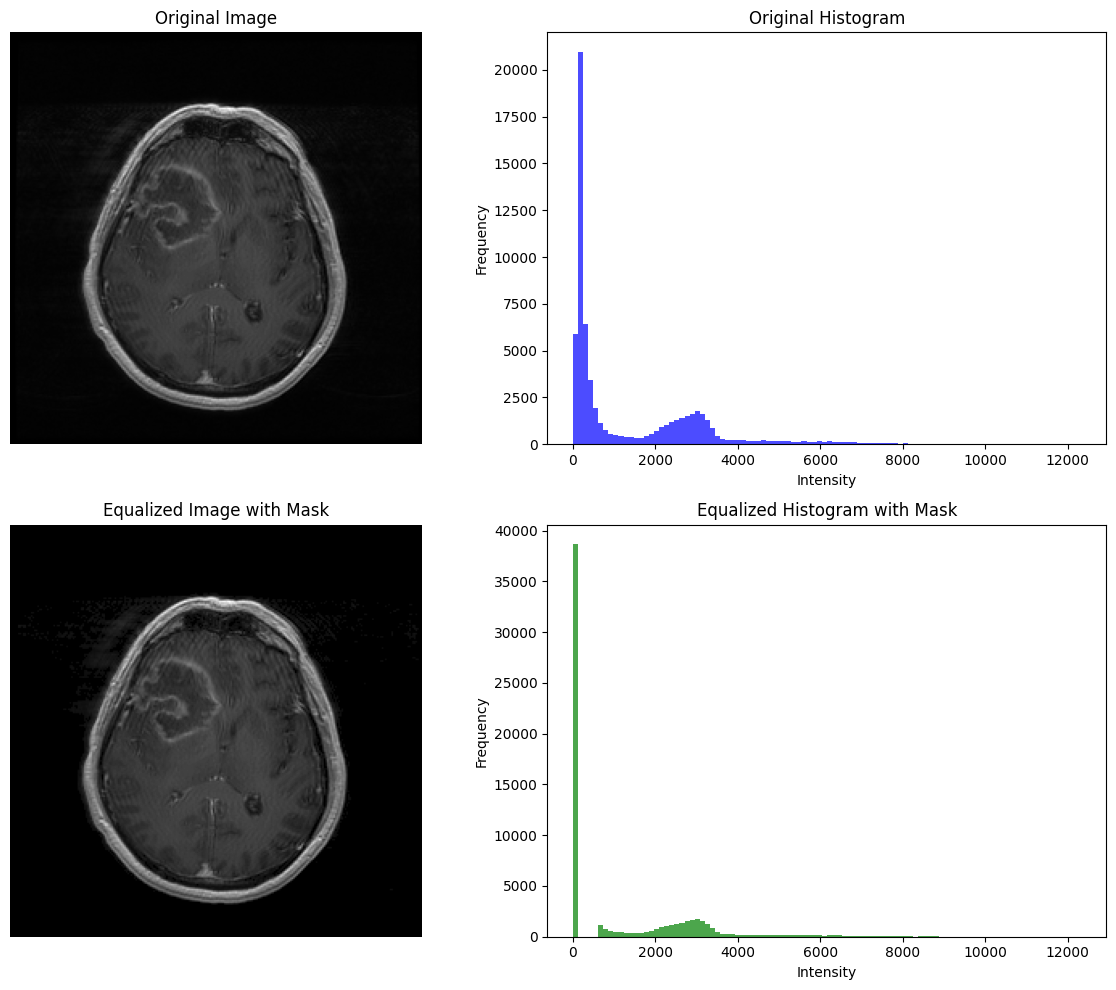

In [17]:
##### MAL ######

# Define a mask to exclude the background (low intensities)
threshold = 0.05 * np.max(slice_data)  # Define a meaningful threshold
roi_mask = slice_data < threshold  # ROI includes only intensities above the threshold

# Apply histogram equalization only on the masked region
equalized_slice = np.copy(slice_data)  # Copy original slice
equalized_slice[roi_mask] = exposure.equalize_hist(slice_data[roi_mask])  # Equalize ROI

# Visualize the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Image and Histogram
axes[0, 0].imshow(slice_data.T, cmap='gray', origin='lower')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].hist(slice_data.flatten(), bins=100, color='blue', alpha=0.7)
axes[0, 1].set_title("Original Histogram")
axes[0, 1].set_xlabel("Intensity")
axes[0, 1].set_ylabel("Frequency")

# Equalized Image and Histogram with Mask
axes[1, 0].imshow(equalized_slice.T, cmap='gray', origin='lower')
axes[1, 0].set_title("Equalized Image with Mask")
axes[1, 0].axis("off")

axes[1, 1].hist(equalized_slice.flatten(), bins=100, color='green', alpha=0.7)
axes[1, 1].set_title("Equalized Histogram with Mask")
axes[1, 1].set_xlabel("Intensity")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Filtering



In [18]:
from skimage import filters


Convolution Filters (also known as kernels) are used with images for blurring, sharpening, embossing, edge detection, and more. This is accomplished by doing a convolution between a kernel and an image.

**Gaussian filter**: The Gaussian smoothing filter is a 2-D convolution filter that is used to `blur' images and remove detail and noise. 

  * Use the *filters.gaussian* command from skimage library to apply the filter on the image.

  * Plot the original and filtered images side-by-side and examine the differences.



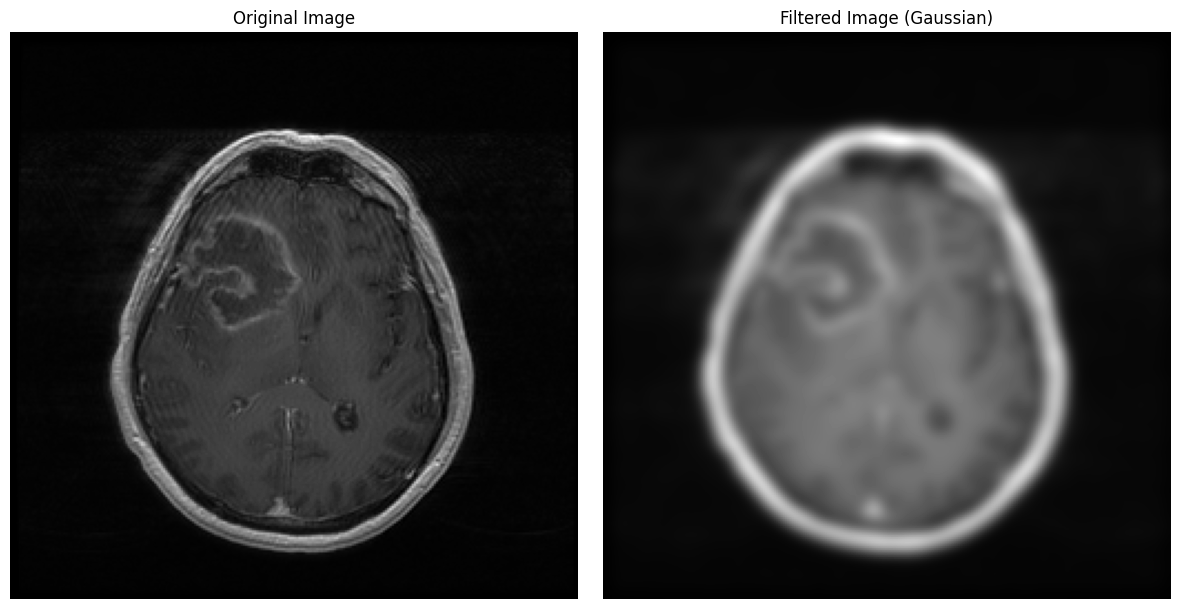

In [21]:
sigma = 3
filtered_slice = filters.gaussian(slice_data, sigma=sigma, mode='reflect')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=np.max(slice_data))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(filtered_slice.T, cmap='gray', origin='lower', vmin=0, vmax=np.max(filtered_slice))
axes[1].set_title("Filtered Image (Gaussian)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

**Laplacian filter:** The Laplacian is a 2-D isotropic measure of the 2nd spatial derivative of an image. The Laplacian of an image highlights regions of rapid intensity change and is therefore often used for edge detection. 

  * Use the *filters.laplace* command from skimage library to apply the filter on the image.

  * Plot the original and filtered images side-by-side and examine the differences.

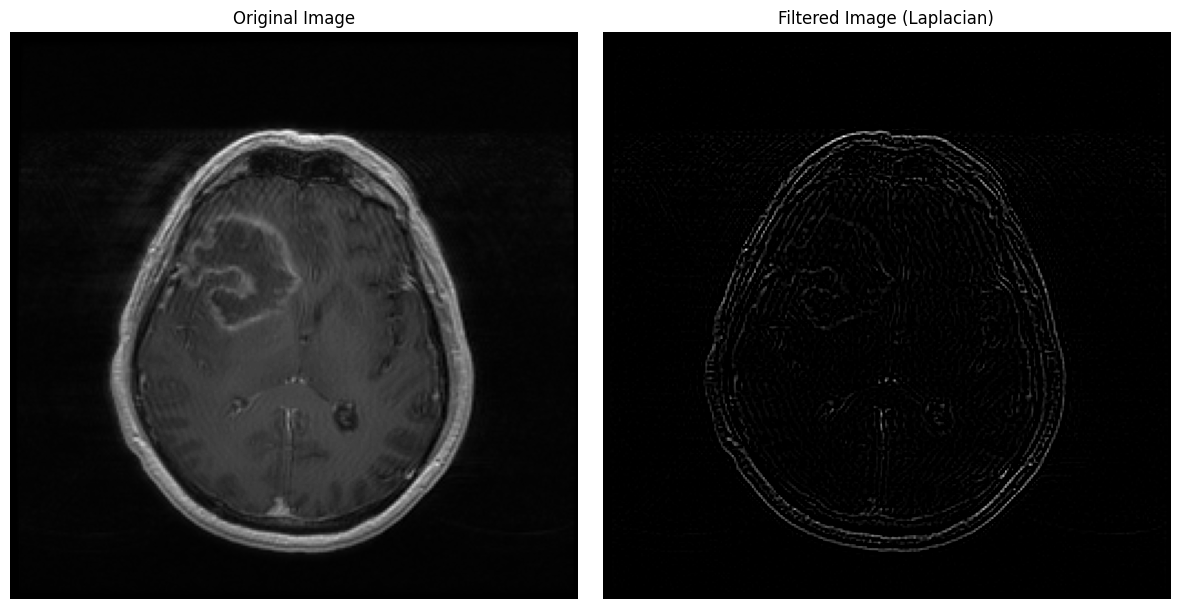

In [25]:
filtered_slice = filters.laplace(slice_data, ksize=3)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=np.max(slice_data))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(filtered_slice.T, cmap='gray', origin='lower', vmin=0, vmax=np.max(filtered_slice))
axes[1].set_title("Filtered Image (Laplacian)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

**Custom filter:** By defining a custom kernel we can create our own filters to extract custom features.

  * Define your own filter by just defining a 3x3x3 kernel. 

  * Use the *filters.convolve* command from skimage library to apply the filter on the image.

  * Plot the original and filtered images side-by-side and examine the differences.

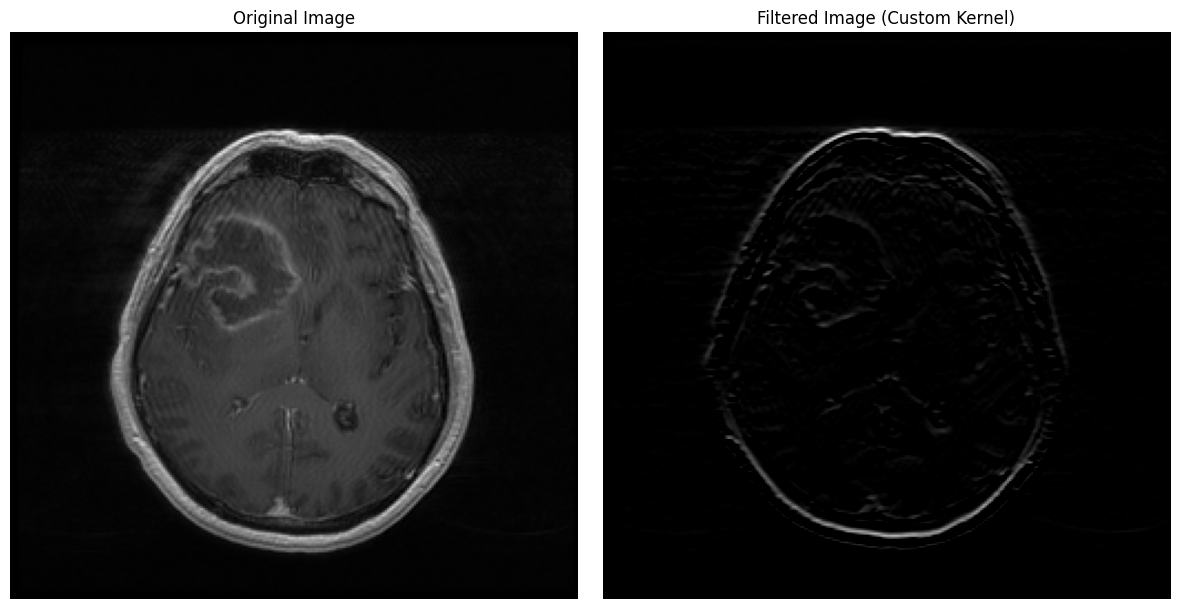

In [29]:
from scipy.ndimage import convolve

custom_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]]) 

filtered_slice = convolve(slice_data, custom_kernel, mode='reflect')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
axes[0].imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=np.max(slice_data))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Imagen filtrada
axes[1].imshow(filtered_slice.T, cmap='gray', origin='lower', vmin=0, vmax=np.max(filtered_slice))
axes[1].set_title("Filtered Image (Custom Kernel)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 1.5 Affine transforms 

* Trasformation are crucial to understand and combine medical images
* Images (and volumes) can be thought of as fields (or functions) of space.
* Some examples are linear transforms are: translation, rotation or scaling 
* Rotation and scaling can be each written as matrix vector products
* We cannot do that for translations. But we can embed translations into a matrix-vector product if we bump up the dimensión by 1.

Normally we don't apply affine transformations directly on the image headers instead we use libraries or programs that do it for us. 
But in this case to exemplify what we have seen in the theory classes we can try to apply some basic transformations simply by modifying some parameters of the image header that define its position and orientation. 

To apply a affine transformation to an image we can extract the affine transformation that represents the position and orientation of the image contained in the nifty file, apply the desired transform and then save back to the image.
To do so we will do the following steps:

1.   Obtain the affine transform of the image "img.affine"
2.   Apply the desired transformations to the affine matrix
3.   Use the set_qform / set_sform methods of the original image "img" to include the new transformation affine to the image header.


In [30]:
affine = nifti_image.affine
print("Original Affine Matrix:\n", affine)

translated_affine = np.copy(affine)
rotated_affine = np.copy(affine)
scaled_affine = np.copy(affine)

Original Affine Matrix:
 [[ -1.01559997   0.           0.         130.897995  ]
 [  0.           1.01559997   0.         -93.8609848 ]
 [  0.           0.           1.5        -28.34379959]
 [  0.           0.           0.           1.        ]]


### Translation

* As a first attempt we can try to move 10 mm in the x axis. 
* To do so we need to add 10 mm to the [0,3] position of the affine matrix.

In [33]:
translated_affine[0, 3] += 10

### Rotation

* As a first attempt we can try to rotate the image 45º in a selected axis.
* How can we do that?

In [34]:
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0, 0],
    [np.sin(theta), np.cos(theta),  0, 0],
    [0,             0,              1, 0],
    [0,             0,              0, 1]
])
rotated_affine = np.dot(rotation_matrix, rotated_affine)

### Scaling

* As a first attemp we can try to enlarge the image two times the original.
* How can we do that?

In [35]:
scaling_matrix = np.diag([2, 2, 2, 1]) 
scaled_affine = np.dot(scaling_matrix, scaled_affine)

### Save

In [37]:
header = nifti_image.header.copy()
header.set_qform(translated_affine, code=1)
header.set_sform(rotated_affine, code=1)    
header.set_sform(scaled_affine, code=1)    

In [39]:
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 256 120   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.0000000e+00  1.0156000e+00  1.0156000e+00  1.5000000e+00
  5.9439996e-03  1.0000000e+00  1.0000000e+00  6.8553000e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : np.bytes_(b'TE=2.532000065;sec=68553.0000')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quat

# Part 2 -  Basic pipeline for neuroimaging
So far we have been studying and applying basic operations to understand the basics of image processing, but when we work on a day-to-day basis we use image processing libraries that allow us to define fast image processing and analysis flows. 

# Regarding to ANTsPy

Advanced Normalization Tools (ANTs) is useful for managing, interpreting and visualizing multidimensional data. ANTs is popularly considered a state-of-the-art medical image registration and segmentation toolkit. ANTsR is an emerging tool supporting standardized multimodality image analysis. ANTs depends on the Insight ToolKit (ITK), a widely used medical image processing library to which ANTs developers contribute.

ANTsPy is a Python library which wraps the C++ biomedical image processing library ANTs, matches much of the statistical capabilities of ANTsR, and allows seamless integration with numpy, scikit-learn, and the greater Python community.

Due ANTsPyx is not available by default at Google Colab so we need to install it using pip.

A basic pipeline for neuroimaging consist on the following steps:


1.   Loading the image
2.   Resample the images to set a common resolution for the whole dataset.
3.   Bias field correction: Bias field signal is a low-frequency and very smooth signal that corrupts MRI images specially those produced by old MRI (Magnetic Resonance Imaging) 
4.   Denoising: MR images are affected by random noise which limits the accuracy of any quantitative measurements from the data. To remove the noise from MRI is needed  to generate the MR images with high “signal-to-noise ratio”.
5.   Registration to a common space




### Install ANTsPyx
Due ANTsPyx is not available by default at Google Colab so we need to install it using !pip.


### Load the images

* Load the image we want to process. To do so we will process the *IVY_GAP_W01/T1c/T1.nii*
* Load the image we want to use as a reference for the common space. The reference image to be used will be *MNI_ATLAS/mni_icbm152_t1_tal_nlin_sym_09c.nii*. This image will be used in the "Register the image to a common reference space" step. 
* To do so we can use the command *ants.image_read*

### Resample the image we want to process
* To do so we can use the command ants.resample_image
* We can resample images to a resolution of 5x5x5 mm. This resolution is not optimal but it will make all the processing faster.
* Save the resulting images in nifti using the *ants.image_write*: command

### Perform a bias field correction

*  What does bieas field correction does? You can find a description on https://simpleitk.readthedocs.io/en/master/link_N4BiasFieldCorrection_docs.html 
*   To do so we can use the command *ants.n4_bias_field_correction*
*   We will use the default parameters.
*  Save the resulting images in nifti using the *ants.image_write*: command



### Remove noise from the images


*   To do so we can use the command *ants.denoise_image*
*   We will use the default parameters
*   Save the resulting images in nifti using the *ants.image_write*: command

### Register the image to a common reference space

*   To do so we will use the command *ants.registration*
*   We will register the image using two different types of transform "AffineFast" (affine transformation) and "SyN" (a non-linear trasformation) 


* Save the resulting images in nifti using the *ants.image_write*: command

* Once we have both images registered to a common space using linear and non-linear transformations we can compare them with the MNI image used as a reference in ITK-Snap